# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's load MNIST dataset

In [0]:
%tensorflow_version 2.x
import tensorflow

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


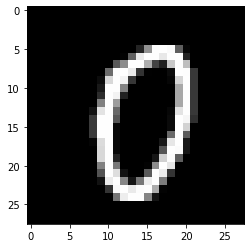

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train_0_4 = X_train[y_train<5]
X_test_0_4 =X_test[y_test<5]

y_train_0_4 = y_train[y_train<5]
y_test_0_4 = y_test[y_test<5]

checking the values  


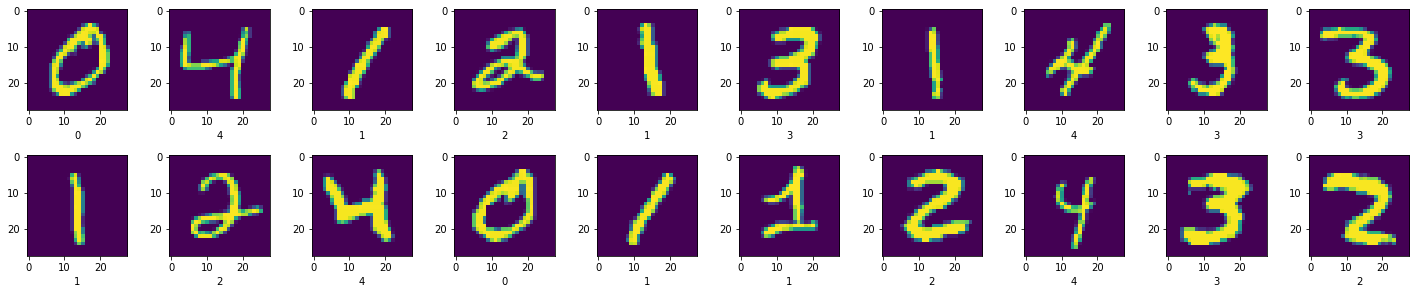

In [71]:
print("checking the values  ")
plt.figure(figsize=(20,20))
for i in range(0,20):
  plt.subplot(10,10,i+1)
  plt.tight_layout()
  plt.imshow(X_train_0_4[i])
  plt.xlabel(y_train_0_4[i])
  i += 1

In [0]:
X_train_5_9 = X_train[y_train>=5]
X_test_5_9 =X_test[y_test>=5]

y_train_5_9 = y_train[y_train>=5]
y_test_5_9 = y_test[y_test>=5]

checking the values  


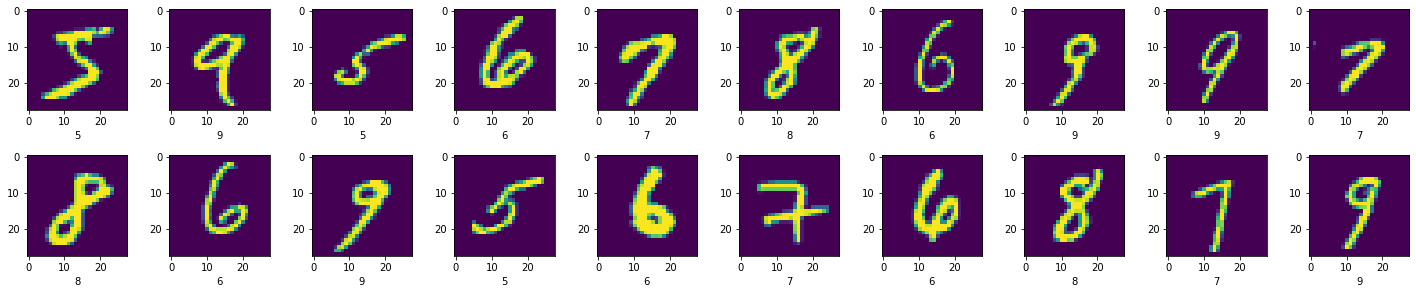

In [73]:
print("checking the values  ")
plt.figure(figsize=(20,20))
for i in range(0,20):
  plt.subplot(10,10,i+1)
  plt.tight_layout()
  plt.imshow(X_train_5_9[i])
  plt.xlabel(y_train_5_9[i])
  i += 1

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [74]:
print("The shape of X_train having digits below 5 is:  ",X_train_0_4.shape)
print("The shape of X_test having digits below 5 is:   ",X_test_0_4.shape)
print("The shape of y_train having digits below 5 is:  ",y_train_0_4.shape)
print("The shape of y_test having digits below 5 is:   ",y_test_0_4.shape)

The shape of X_train having digits below 5 is:   (30596, 28, 28)
The shape of X_test having digits below 5 is:    (5139, 28, 28)
The shape of y_train having digits below 5 is:   (30596,)
The shape of y_test having digits below 5 is:    (5139,)


In [75]:
print("The shape of X_train having digits above 5 is:==>",X_train_5_9.shape)
print("The shape of X_test having digits above 5 is:==>",X_test_5_9.shape)
print("The shape of y_train having digits above 5 is:==>",y_train_5_9.shape)
print("The shape of y_test having digits above 5 is:==>",y_test_5_9.shape)

The shape of X_train having digits above 5 is:==> (29404, 28, 28)
The shape of X_test having digits above 5 is:==> (4861, 28, 28)
The shape of y_train having digits above 5 is:==> (29404,)
The shape of y_test having digits above 5 is:==> (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [76]:
x_train_reshape=X_train_0_4.reshape(30596,28,28,1)

print("After reshaping the train data of first dataset:  ",x_train_reshape.shape)

After reshaping the train data of first dataset:   (30596, 28, 28, 1)


In [77]:
x_test_reshape = X_test_0_4.reshape(5139,28,28,1)

print("After reshaping the test data of first dataset:  ",x_test_reshape.shape)

After reshaping the test data of first dataset:   (5139, 28, 28, 1)


## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train_reshape=x_train_reshape/255

In [0]:
x_test_reshape = x_test_reshape/255 

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [80]:
print("The shape of X_train having digits below 5 is:   ",x_train_reshape.shape)
print("The number of images in X_train is:   ",x_train_reshape.shape[0])
print("The number of images in X_test is:    ",x_test_reshape.shape[0])

The shape of X_train having digits below 5 is:    (30596, 28, 28, 1)
The number of images in X_train is:    30596
The number of images in X_test is:     5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [0]:
import tensorflow as tf
y_train_0_4_0 = tf.keras.utils.to_categorical(y_train_0_4,num_classes=5)
y_test_0_4_0 = tf.keras.utils.to_categorical(y_test_0_4,num_classes=5)

## Question 6
We will build our model by using Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:

from tensorflow.keras import models,layers
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Dropout(.20))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(5,activation='softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [87]:
model.fit(x_train_reshape,y_train_0_4_0 ,batch_size=128,epochs=10,validation_data=(x_test_reshape,y_test_0_4_0))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 4s 120us/sample - loss: 0.1602 - accuracy: 0.9483 - val_loss: 0.5836 - val_accuracy: 0.9844
Epoch 2/10
30596/30596 [==============================] - 3s 107us/sample - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.1094 - val_accuracy: 0.9856
Epoch 3/10
30596/30596 [==============================] - 3s 105us/sample - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0294 - val_accuracy: 0.9934
Epoch 4/10
30596/30596 [==============================] - 3s 106us/sample - loss: 0.0337 - accuracy: 0.9901 - val_loss: 0.0202 - val_accuracy: 0.9944
Epoch 5/10
30596/30596 [==============================] - 3s 107us/sample - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.0168 - val_accuracy: 0.9959
Epoch 6/10
30596/30596 [==============================] - 3s 103us/sample - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.0148 - val_accuracy: 0.9963
Epoch 7/10
30596/30596 [===========================

In [0]:
y_pred = model.predict(x_test_reshape)

In [89]:
import numpy as np
out = []
for i in y_pred:
  out.append(np.argmax(i))
print(out)

[2, 1, 0, 4, 1, 4, 0, 0, 1, 3, 4, 4, 0, 4, 0, 1, 3, 1, 3, 4, 2, 1, 2, 1, 1, 4, 2, 3, 1, 2, 4, 4, 3, 0, 4, 1, 3, 4, 4, 3, 0, 0, 2, 1, 3, 2, 2, 4, 3, 1, 3, 3, 1, 4, 1, 0, 4, 2, 1, 4, 3, 4, 4, 4, 2, 4, 0, 1, 0, 1, 4, 3, 1, 1, 2, 0, 2, 1, 0, 3, 4, 4, 4, 4, 1, 4, 4, 2, 3, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 3, 1, 4, 2, 3, 1, 1, 1, 3, 2, 4, 3, 0, 3, 2, 2, 1, 2, 4, 1, 3, 3, 2, 2, 4, 1, 2, 3, 0, 4, 4, 2, 4, 1, 2, 2, 1, 1, 0, 3, 0, 1, 4, 1, 2, 1, 2, 2, 4, 1, 2, 2, 0, 4, 0, 0, 2, 4, 1, 2, 4, 0, 2, 4, 3, 3, 0, 0, 3, 1, 2, 2, 3, 0, 4, 2, 0, 1, 1, 2, 1, 3, 3, 1, 3, 1, 0, 1, 3, 1, 1, 1, 4, 2, 2, 0, 3, 2, 0, 4, 1, 1, 4, 0, 3, 3, 1, 2, 1, 2, 1, 2, 4, 4, 2, 3, 2, 4, 0, 3, 1, 1, 2, 1, 4, 2, 2, 0, 4, 1, 4, 1, 4, 3, 0, 0, 3, 0, 2, 4, 3, 3, 3, 2, 3, 1, 2, 0, 3, 2, 1, 4, 1, 2, 1, 4, 0, 1, 0, 2, 3, 4, 0, 3, 2, 1, 3, 1, 3, 4, 2, 2, 3, 2, 4, 1, 3, 0, 3, 3, 1, 3, 4, 4, 4, 2, 1, 2, 4, 4, 0, 0, 2, 3, 2, 0, 4, 4, 0, 0, 4, 0, 3, 4, 3, 3, 3, 3, 3, 0, 2, 1, 0, 4, 3, 0, 3, 0, 0, 2, 4, 0, 2, 2, 3, 1, 1, 0, 4, 2, 3, 2, 

In [90]:
from sklearn.metrics import accuracy_score,classification_report
acc = accuracy_score(y_test_0_4,out)
report=classification_report(y_test_0_4,out)
print("This is the obtained accuracy {}%".format(acc*100))
print("precision & accuracy:-")
print(report)

This is the obtained accuracy 99.68865538042421%
precision & accuracy:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982

    accuracy                           1.00      5139
   macro avg       1.00      1.00      1.00      5139
weighted avg       1.00      1.00      1.00      5139



## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [91]:
print("The no. of layers in the model:   ",len(model.layers))

The no. of layers in the model:    9


In [92]:
model.layers[:5]

In [93]:
print("Freezing the model")
for layer in model.layers[:5]:
  layer.trainable = False

Freezing the model


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [94]:
y_train_5_9_0 = y_train_5_9 - 5
y_test_5_9_0 = y_test_5_9 - 5
print("Checking the values present in the labels now:   ", np.unique(y_test_5_9_0))

Checking the values present in the labels now:    [0 1 2 3 4]


### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [95]:
print("Checking the second dataset")
x_train_0 = X_train_5_9.reshape(29404,28,28,1)
x_test_0 = X_test_5_9.reshape(4861,28,28,1)

Checking the second dataset


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [96]:
print("Normalizing the second dataset")
x_train_0 = x_train_0/255
x_test_0 = x_test_0/255

Normalizing the second dataset


### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [97]:
print("The shape of X_train having digits below 5 is:  ",x_train_0.shape)
print("The number of images in X_train is:  ",x_train_0.shape[0])
print("The number of images in X_test is:    ",x_test_0.shape[0])

The shape of X_train having digits below 5 is:   (29404, 28, 28, 1)
The number of images in X_train is:   29404
The number of images in X_test is:     4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [0]:
y_train_1 = tf.keras.utils.to_categorical(y_train_5_9_0,num_classes=5)
y_test_1 = tf.keras.utils.to_categorical(y_test_5_9_0,num_classes=5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [104]:
model.fit(x_train_0,y_train_1,batch_size=128,epochs=10,validation_data=(x_test_0,y_test_1))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 83us/sample - loss: 0.2137 - accuracy: 0.9377 - val_loss: 0.0680 - val_accuracy: 0.9786
Epoch 2/10
29404/29404 [==============================] - 2s 66us/sample - loss: 0.0763 - accuracy: 0.9751 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 3/10
29404/29404 [==============================] - 2s 65us/sample - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.0413 - val_accuracy: 0.9850
Epoch 4/10
29404/29404 [==============================] - 2s 65us/sample - loss: 0.0545 - accuracy: 0.9819 - val_loss: 0.0459 - val_accuracy: 0.9844
Epoch 5/10
29404/29404 [==============================] - 2s 66us/sample - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0359 - val_accuracy: 0.9877
Epoch 6/10
29404/29404 [==============================] - 2s 65us/sample - loss: 0.0423 - accuracy: 0.9856 - val_loss: 0.0383 - val_accuracy: 0.9860
Epoch 7/10
29404/29404 [==============================] -

In [0]:
y_pred1 = model.predict(x_test_0)

In [106]:
out1 = []
for i1 in y_pred1:
  out1.append(np.argmax(i1))
print(out1)  

[2, 4, 1, 4, 1, 4, 0, 4, 2, 4, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 4, 0, 2, 3, 4, 2, 1, 2, 4, 2, 4, 2, 2, 1, 2, 3, 2, 1, 1, 4, 2, 1, 4, 1, 0, 4, 4, 4, 3, 2, 4, 2, 4, 0, 2, 1, 2, 4, 0, 3, 0, 1, 1, 0, 2, 3, 1, 1, 2, 2, 3, 4, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 3, 3, 3, 0, 3, 4, 0, 4, 1, 1, 4, 0, 4, 0, 4, 4, 1, 0, 0, 2, 2, 3, 2, 3, 3, 2, 4, 0, 4, 3, 2, 4, 0, 2, 2, 3, 1, 3, 0, 2, 2, 4, 3, 3, 4, 4, 3, 4, 2, 0, 4, 1, 0, 3, 4, 3, 2, 2, 4, 1, 0, 0, 4, 4, 2, 0, 4, 2, 3, 1, 0, 1, 3, 0, 0, 0, 1, 3, 0, 2, 4, 1, 0, 1, 0, 1, 2, 3, 3, 0, 2, 1, 1, 4, 3, 1, 4, 0, 0, 3, 3, 0, 2, 2, 0, 2, 4, 2, 4, 4, 4, 3, 3, 0, 4, 3, 3, 2, 1, 1, 1, 4, 4, 1, 3, 0, 1, 1, 1, 3, 3, 2, 0, 3, 4, 1, 3, 0, 4, 4, 2, 0, 3, 4, 4, 0, 2, 3, 4, 1, 4, 0, 1, 0, 2, 1, 1, 0, 3, 4, 2, 3, 4, 1, 3, 0, 3, 3, 2, 2, 3, 2, 2, 4, 1, 4, 4, 3, 1, 1, 0, 3, 4, 2, 3, 3, 2, 1, 0, 3, 4, 1, 3, 4, 4, 1, 3, 1, 3, 0, 2, 3, 1, 4, 2, 0, 3, 1, 1, 2, 4, 4, 3, 4, 2, 0, 4, 3, 0, 2, 1, 2, 0, 3, 2, 4, 3, 1, 2, 2, 4, 4, 0, 2, 4, 2, 1, 4, 2, 3, 1, 2, 3, 0, 3, 0, 2, 

In [107]:
len(out1)

4861

In [111]:
print("Converting back to original labels so as to evaluate the performance.")
out2 = [i1+5 for i1 in out1]

Converting back to original labels so as to evaluate the performance.


-----------------------------------------------------------------------------

In [112]:
from sklearn.metrics import accuracy_score,classification_report
acc0 = accuracy_score(y_test_5_9,out2)
report0=classification_report(y_test_5_9,out2)
print("This is the obtained accuracy {}%".format(acc0*100))
print("This is the report with the detailed scoring of F1 scores,precision & accuracy:-")
print(report0)

This is the obtained accuracy 99.01254885825962%
This is the report with the detailed scoring of F1 scores,precision & accuracy:-
              precision    recall  f1-score   support

           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99      4861
   macro avg       0.99      0.99      0.99      4861
weighted avg       0.99      0.99      0.99      4861



# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df= pd.read_csv('/content/drive/My Drive/CNN PROJECT/tweets.csv',encoding= 'unicode_escape')

### Drop null values
- drop all the rows with null values

In [119]:
df.isnull()
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [0]:
df.dropna(inplace = True)

In [121]:
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [122]:
df.head(5)

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...  ...                                   Negative emotion
1  @jessedee Know about @fludapp ? Awesome iPad/i...  ...                                   Positive emotion
2  @swonderlin Can not wait for #iPad 2 also. The...  ...                                   Positive emotion
3  @sxsw I hope this year's festival isn't as cra...  ...                                   Negative emotion
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  ...                                   Positive emotion

[5 rows x 3 columns]

## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
import re
df['tweet_text'] = df['tweet_text'].map(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['tweet_text'] = df['tweet_text'].map(lambda s: s.lower())
df['tweet_text']= df['tweet_text'].str.strip()


print dataframe

In [124]:
df

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0     wesley83  have a 3 ihone fter 3 hrs tweeting a...  ...                                   Negative emotion
1     jessedee now about fludapp  wesome iadihone ap...  ...                                   Positive emotion
2     swonderlin an not wait for #iad 2 also hey sho...  ...                                   Positive emotion
3     sxsw  hope this years festival isnt as crashy ...  ...                                   Negative emotion
4     sxtxstate great stuff on ri # arissa ayer oogl...  ...                                   Positive emotion
...                                                 ...  ...                                                ...
9077  mention your  guy just convinced me to switch ...  ...                                   Positive emotion
9079  quotpapyrussort of like the ipadquot  nice ol ...  ...                                   Positive emotion
9080  iller says oogle  quotmight be run over by the...  ...                                   Negative emotion
9085  ve always used amera+ for my ihone bc it has a...  ...                                   Positive emotion
9088                              pad everywhere # link  ...                                   Positive emotion

[3291 rows x 3 columns]

## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
df_new=df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion','Negative emotion'])]

In [126]:
df_new['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [127]:
df_new['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion':1, 'Negative emotion':0})
df_new

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0     wesley83  have a 3 ihone fter 3 hrs tweeting a...  ...                                                0.0
1     jessedee now about fludapp  wesome iadihone ap...  ...                                                1.0
2     swonderlin an not wait for #iad 2 also hey sho...  ...                                                1.0
3     sxsw  hope this years festival isnt as crashy ...  ...                                                0.0
4     sxtxstate great stuff on ri # arissa ayer oogl...  ...                                                1.0
...                                                 ...  ...                                                ...
9077  mention your  guy just convinced me to switch ...  ...                                                1.0
9079  quotpapyrussort of like the ipadquot  nice ol ...  ...                                                1.0
9080  iller says oogle  quotmight be run over by the...  ...                                                0.0
9085  ve always used amera+ for my ihone bc it has a...  ...                                                1.0
9088                              pad everywhere # link  ...                                                1.0

[3191 rows x 3 columns]

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df_new['tweet_text']
y = df_new['is_there_an_emotion_directed_at_a_brand_or_product']

In [129]:
X.head()

0    wesley83  have a 3 ihone fter 3 hrs tweeting a...
1    jessedee now about fludapp  wesome iadihone ap...
2    swonderlin an not wait for #iad 2 also hey sho...
3    sxsw  hope this years festival isnt as crashy ...
4    sxtxstate great stuff on ri # arissa ayer oogl...
Name: tweet_text, dtype: object

In [130]:
y.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range =(1,2),   
                             stop_words = 'english',   
                             min_df=2) 

In [133]:
X_train.head()

5377    mention greed  ovelty of #iad news #apps fades...
6077    mention ll use an iad 2 if someone gives it to...
5060    mention his technology couldnt happen on an ih...
8745    en benieuwd  mention e interrupt your regularl...
21      h y od he # app for iad is pure unadulterated ...
Name: tweet_text, dtype: object

In [0]:
X_train = vectorizer.fit_transform(X_train)

In [0]:
test_f = vectorizer.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

### Fit the classifer
- fit logistic regression classifier

In [137]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [139]:
model1.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_predict_lg = model.predict(test_f)

In [144]:
y_predict_lg

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_predict_n = model1.predict(test_f)

In [147]:
y_predict_n 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [0]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(y_test, y_predict_lg)

0.8721804511278195

In [150]:
print(metrics.confusion_matrix(y_test, y_predict_lg))
print(metrics.classification_report(y_test, y_predict_lg))

[[ 34  91]
 [ 11 662]]
              precision    recall  f1-score   support

         0.0       0.76      0.27      0.40       125
         1.0       0.88      0.98      0.93       673

    accuracy                           0.87       798
   macro avg       0.82      0.63      0.66       798
weighted avg       0.86      0.87      0.85       798



### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [0]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test, y_predict_n)

0.868421052631579

In [153]:
print(metrics.confusion_matrix(y_test, y_predict_n))
print(metrics.classification_report(y_test, y_predict_n))

[[ 36  89]
 [ 16 657]]
              precision    recall  f1-score   support

         0.0       0.69      0.29      0.41       125
         1.0       0.88      0.98      0.93       673

    accuracy                           0.87       798
   macro avg       0.79      0.63      0.67       798
weighted avg       0.85      0.87      0.84       798

